In [84]:
import pandas as pd
import numpy as np

In [85]:
data = pd.read_csv("car_price_prediction.csv")
data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [87]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

data['Levy'] = data['Levy'].replace('-', np.nan).astype(float)
data['Levy'] = data['Levy'].fillna(data['Levy'].mean())

data['Mileage'] = data['Mileage'].str.replace(' km','',regex = False)
data['Engine volume'] = data['Engine volume'].str.replace(' Turbo','',regex = False)

data = data.drop(columns = ["ID"])

data.head(5)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,16621,1018.000000,8,658,2011,4,0,5,3,192000,6.0,2,0,1,0,1,8
2,8467,906.838128,21,684,2006,3,0,5,1.3,200000,4.0,3,1,1,1,1,2
3,3607,862.000000,16,661,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0
4,11726,446.000000,21,684,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4


In [89]:
X = data.iloc[:,1:]
y = data["Price"]

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


# ORTAK BİR PRED ANALİZ FONKSİYONU

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"MAE : {mean_absolute_error(y_test,y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print("-" * 50)


# LİNEER REGRESSİON MODEL

In [92]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(X_test)
y_pred

array([ 5036.94346245, 53079.53353335, 11267.75399533, ...,
        6830.64757534,   774.46623958, 13067.00047674])

In [94]:
evaluate(y_test,y_pred,"Lineer Regression")

Model: Lineer Regression
MAE : 13442.09
MSE: 434239053.89
RMSE: 20838.40
R² Score: -0.15
--------------------------------------------------


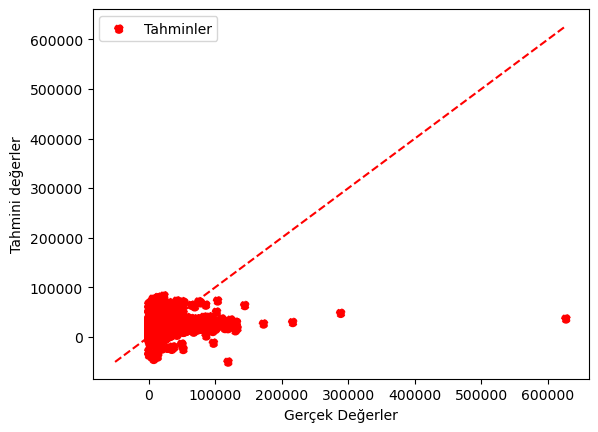

In [95]:
plot.scatter(y_test,y_pred, label = "Tahminler",color = "red", linestyle = "--")
plot.xlabel("Gerçek Değerler")
plot.ylabel("Tahmini değerler")
plot.legend()

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plot.plot([min_val,max_val],[min_val,max_val],color = "red", linestyle = "--")
plot.show()


# RANDOM FOREST MODEL

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)



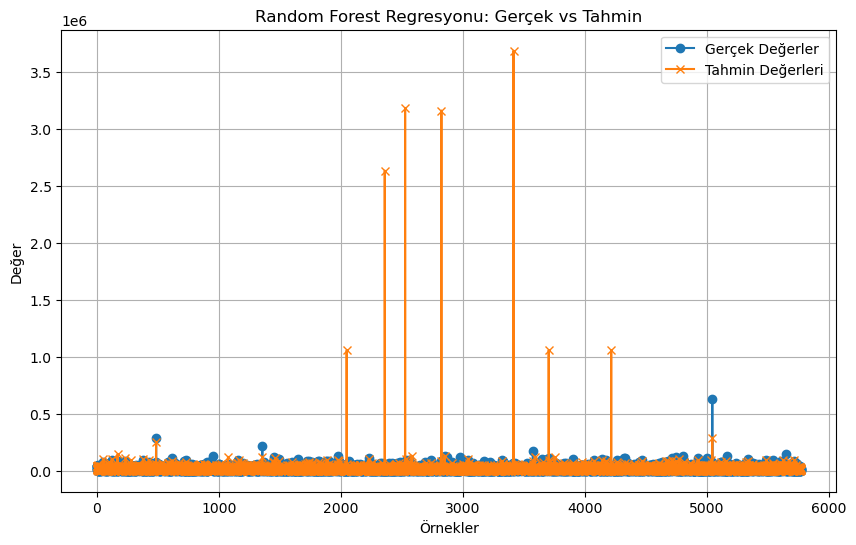

In [97]:
# Gerçek vs Tahmin Değerleri
plot.figure(figsize=(10,6))
plot.plot(y_test.values, label='Gerçek Değerler', marker='o')
plot.plot(y_pred, label='Tahmin Değerleri', marker='x')
plot.title('Random Forest Regresyonu: Gerçek vs Tahmin')
plot.xlabel('Örnekler')
plot.ylabel('Değer')
plot.legend()
plot.grid(True)
plot.show()

In [98]:
evaluate(y_test,y_pred,'Random Forest')

Model: Random Forest
MAE : 7258.14
MSE: 7709055802.10
RMSE: 87801.23
R² Score: -19.46
--------------------------------------------------


# DECİSİON TREE MODEL 

In [99]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4,random_state = 42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

evaluate(y_test,y_pred,'Decision Tree')

Model: Decision Tree
MAE : 14817.98
MSE: 120160975895.88
RMSE: 346642.43
R² Score: -317.95
--------------------------------------------------


Text(0.5, 1.0, 'Decision Tree')

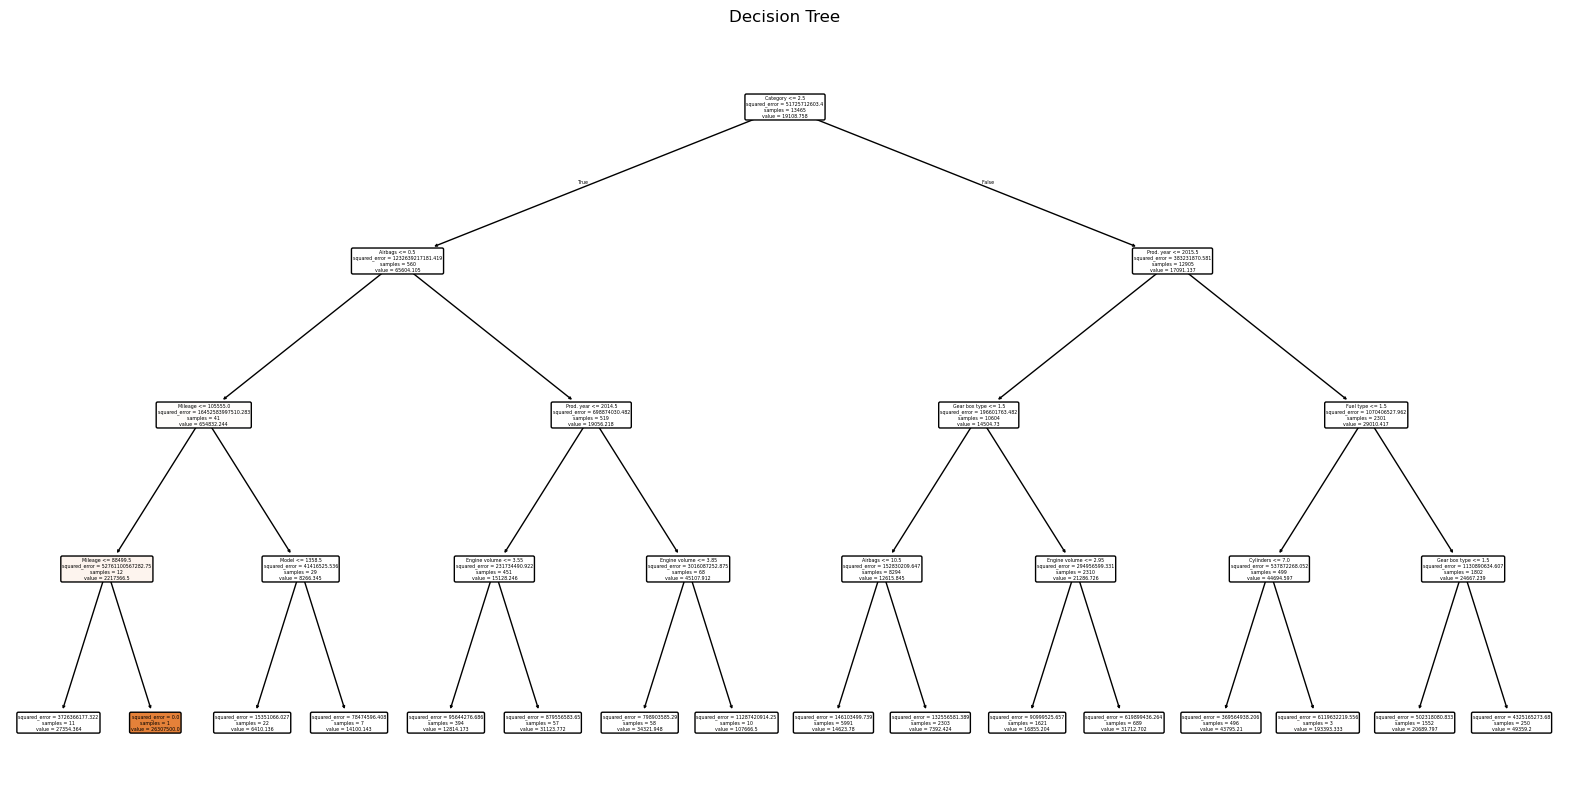

In [100]:
from sklearn.tree import plot_tree

plot.figure(figsize = (20,10))
plot_tree(model, feature_names=X.columns,filled=True,rounded = True)
plot.title("Decision Tree")